### Clean Tracts

_Clips Illinois census tracts (2020) to the City of Chicago's boundaries and merges the resulting geometries with cleaned demographic data from the 2021 American Community Survey. The output consists of five CSV files: `population_demographics.csv`, `education_demographics.csv`, `income_demographics.csv`, `commute_demographics.csv`, and `internet_demographics.csv`._

####  Setup

In [1]:
import geopandas as gpd
import pandas as pd
from pathlib import Path

#### Load Chicago Boundaries

In [2]:
# Load and preview data for the City of Chicago
boundaries_dir = "../data/raw/boundaries"
chicago_gdf = gpd.read_file(f"{boundaries_dir}/Boundaries - City.geojson")
chicago_gdf.head()

,name,objectid,shape_area,shape_len,geometry
0,CHICAGO,1,6450276623.31,845282.931362,"MULTIPOLYGON (((-87.93514 42.00089, -87.93521 ..."


<Axes: >

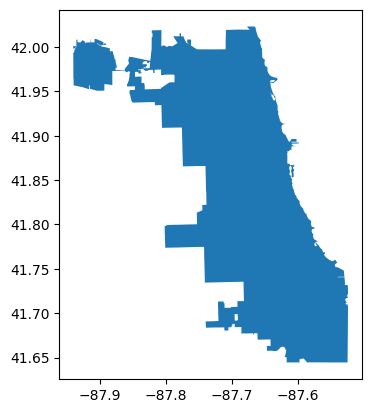

In [3]:
# Plot boundaries
chicago_gdf.plot()

#### Load Illinois Census Tract Boundaries

In [4]:
# Load and preview census tracts for the state of Illinois
il_tracts_gdf = gpd.read_file(f"{boundaries_dir}/tl_2021_17_tract.zip")
il_tracts_gdf.head(2)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,047,957100,17047957100,9571,Census Tract 9571,G5020,S,17502924,151254,+38.3810609,-088.0566832,"POLYGON ((-88.10244 38.39351, -88.10232 38.393..."
1,17,047,956900,17047956900,9569,Census Tract 9569,G5020,S,289722767,430838,+38.4939617,-088.0440563,"POLYGON ((-88.14857 38.46782, -88.14856 38.468..."


<Axes: >

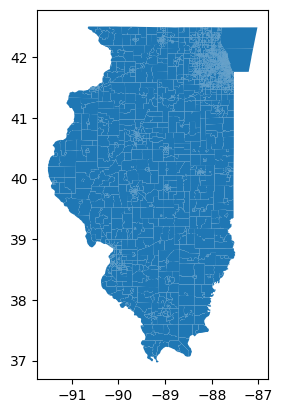

In [5]:
# Plot boundaries
il_tracts_gdf.plot()

#### Clip Census Tract Boundaries to City

In [6]:
# Update tracts to have same CRS as Chicago boundaries
il_tracts_gdf = il_tracts_gdf.to_crs(chicago_gdf.crs)

# Clip census tracts to state boundaries
# NOTE: This is a slow operation.
chicago_tracts_gdf = gpd.clip(il_tracts_gdf, chicago_gdf)

# Preview data
chicago_tracts_gdf.head(2)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1437,17,031,823303,17031823303,8233.03,Census Tract 8233.03,G5020,S,2008920,0,+41.6777448,-087.7279109,"POLYGON ((-87.72096 41.68395, -87.72030 41.683..."
2593,17,031,823304,17031823304,8233.04,Census Tract 8233.04,G5020,S,3553267,0,+41.6814296,-087.7027507,"MULTIPOLYGON (((-87.72004 41.68397, -87.72006 ..."


<Axes: >

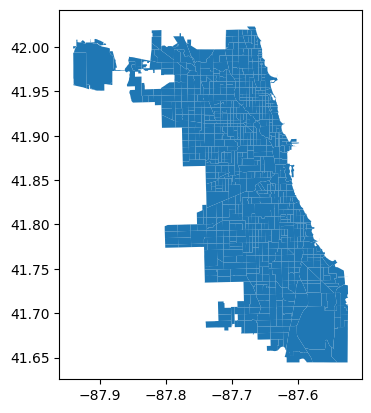

In [7]:
# Plot boundaries
chicago_tracts_gdf.plot()

#### Merge Demographic Data to Tracts

In [8]:
# Load demographic data for all census tracts in Cook County
# (exported from Social Explorer) and preview DataFrame
dems_df = pd.read_csv("../data/raw/demographics/R13395758_SL140.csv")
dems_df = dems_df.iloc[1:, :]
dems_df.head(2)

,FIPS,Qualifying Name,File identification,State Postal Abbreviation,Summary Level,Geographic Component,Logical Record Number,US,Census Region,Census Division,...,Total: Internet Access Without A Subscription.1,Total: No Internet Access.1,Std. Error: Total.2,Std. Error: Total: With An Internet Subscription.1,Std. Error: Total: With An Internet Subscription Dial-Up Alone,Std. Error: Total: With An Internet Subscription Broadband Such As Cable Fiber Optic Or Dsl,Std. Error: Total: With An Internet Subscription Satellite Internet Service,Std. Error: Total: With An Internet Subscription Other Service,Std. Error: Total: Internet Access Without A Subscription.1,Std. Error: Total: No Internet Access.1
1,17031010100,"Census Tract 101, Cook County, Illinois",ACSSF,il,140,00,0005990,NaN,NaN,NaN,...,90,369,185.4545,204.2424,16.36364,200.6061,35.15152,7.272727,38.18182,98.18182
2,17031010201,"Census Tract 102.01, Cook County, Illinois",ACSSF,il,140,00,0005991,NaN,NaN,NaN,...,163,290,200,216.9697,10.30303,241.8182,69.09091,22.42424,71.51515,122.4242


In [9]:
# Merge Chicago census tracts with demographic data and preview DataFrame
merged_df = chicago_tracts_gdf.merge(
    right=dems_df,
    how="left",
    left_on="GEOID",
    right_on="FIPS")
merged_df.head(2)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,Total: Internet Access Without A Subscription.1,Total: No Internet Access.1,Std. Error: Total.2,Std. Error: Total: With An Internet Subscription.1,Std. Error: Total: With An Internet Subscription Dial-Up Alone,Std. Error: Total: With An Internet Subscription Broadband Such As Cable Fiber Optic Or Dsl,Std. Error: Total: With An Internet Subscription Satellite Internet Service,Std. Error: Total: With An Internet Subscription Other Service,Std. Error: Total: Internet Access Without A Subscription.1,Std. Error: Total: No Internet Access.1
0,17,031,823303,17031823303,8233.03,Census Tract 8233.03,G5020,S,2008920,0,...,129,184,113.9394,123.6364,7.272727,106.6667,23.63636,7.272727,61.21212,57.57576
1,17,031,823304,17031823304,8233.04,Census Tract 8233.04,G5020,S,3553267,0,...,117,634,176.9697,159.3939,4.242424,155.1515,59.39394,10.30303,62.42424,127.2727


#### Clean Dataset Columns

In [11]:
# Remove unused columns
cols_to_remove = [
    "US",
    "County Subdivision (FIPS)",
    "Block Group",
    "Consolidated City",
    "American Indian Area/AlaskaNative Area/ Hawaiian Home Land(Census)",
    "American Indian Area/AlaskaNative Area/ Hawaiian Home Land(FIPS)",
    "American Indian Trust Land/Hawaiian Home Land Indicator",
    "American Indian TribalSubdivision (Census)",
    "American Indian TribalSubdivision (FIPS)",
    "Alaska Native RegionalCorporation (FIPS)",
    "Metropolitan and MicropolitanStatistical Area",
    "Combined Statistical Area",
    "Metropolitan Statistical Area-Metropolitan Division",
    "Metropolitan Area Central City",
    "Metropolitan/MicropolitanIndicator Flag",
    "New England City and Town Area",
    "New England City and TownCombined Statistical Area",
    "New England City and Town AreaDivision",
    "Urban Area",
    "Urban Area Central Place",
    "Current Congressional District ***",
    "State Legislative District Upper",
    "State Legislative District Lower",
    "Voting District",
    "ZIP Code Tabulation Area (3-digit)",
    "5-digit ZIP Code Tabulation Area",
    "Subminor Civil Division (FIPS)",
    "State-School District (Elementary)",
    "State-School District (Secondary)",
    "State-School District (Unified)",
    "Urban/Rural",
    "Principal City Indicator",
    "Traffic Analysis Zone",
    "Urban Growth Area",
    "Public Use Microdata Area – 5%File",
    "Public Use Microdata Area - 1% File",
    "Place (FIPS Code)",
    "Census Region",
    "Census Division",
    "State (Census Code)",
    "STATEFP",
    "COUNTYFP",
    "TRACTCE",
    "NAME",
    "NAMELSAD",
    "MTFCC",
    "FUNCSTAT",
    "FIPS",
    "File identification",
    "State Postal Abbreviation",
    "Summary Level",
    "Geographic Component",
    "Logical Record Number",
    "Census Region",
    "Census Division",
    "State (Census Code)",
    "State (FIPS Code)",
    "County of current residence",
    "Census Tract",
    "Geographic Identifier",
    "Area Name",
    "Tribal Tract",
    "Tribal Block Group",
    "Place (State FIPS + Place FIPS)",
    "Total Population.1",
    "INTPTLAT",
    "INTPTLON",
    "Total Population:"
]
merged_gdf = gpd.GeoDataFrame(merged_df.drop(columns=cols_to_remove))
merged_gdf.head(2)

,GEOID,ALAND,AWATER,geometry,Qualifying Name,Total Population,Population Density (Per Sq. Mile),Area (Land),Total Population: Male,Total Population: Female,...,Total: Internet Access Without A Subscription.1,Total: No Internet Access.1,Std. Error: Total.2,Std. Error: Total: With An Internet Subscription.1,Std. Error: Total: With An Internet Subscription Dial-Up Alone,Std. Error: Total: With An Internet Subscription Broadband Such As Cable Fiber Optic Or Dsl,Std. Error: Total: With An Internet Subscription Satellite Internet Service,Std. Error: Total: With An Internet Subscription Other Service,Std. Error: Total: Internet Access Without A Subscription.1,Std. Error: Total: No Internet Access.1
0,17031823303,2008920,0,"POLYGON ((-87.72096 41.68395, -87.72030 41.683...","Census Tract 8233.03, Cook County, Illinois",4059,5233.042,0.775648381382462,1883,2176,...,129,184,113.9394,123.6364,7.272727,106.6667,23.63636,7.272727,61.21212,57.57576
1,17031823304,3553267,0,"MULTIPOLYGON (((-87.72004 41.68397, -87.72006 ...","Census Tract 8233.04, Cook County, Illinois",6316,4603.753,1.37192411702294,3354,2962,...,117,634,176.9697,159.3939,4.242424,155.1515,59.39394,10.30303,62.42424,127.2727


In [12]:
# Clean tract boundary metadata columns and preview DataFrame
id_col_mapping = {
    "GEOID": "geoid",
    "Qualifying Name": "qualifying name",
    "ALAND": "current land area (sq. m)",
    "AWATER": "current water area (sq. m)"
}
merged_gdf = merged_gdf.rename(columns=id_col_mapping)
merged_gdf.head(2)

,geoid,current land area (sq. m),current water area (sq. m),geometry,qualifying name,Total Population,Population Density (Per Sq. Mile),Area (Land),Total Population: Male,Total Population: Female,...,Total: Internet Access Without A Subscription.1,Total: No Internet Access.1,Std. Error: Total.2,Std. Error: Total: With An Internet Subscription.1,Std. Error: Total: With An Internet Subscription Dial-Up Alone,Std. Error: Total: With An Internet Subscription Broadband Such As Cable Fiber Optic Or Dsl,Std. Error: Total: With An Internet Subscription Satellite Internet Service,Std. Error: Total: With An Internet Subscription Other Service,Std. Error: Total: Internet Access Without A Subscription.1,Std. Error: Total: No Internet Access.1
0,17031823303,2008920,0,"POLYGON ((-87.72096 41.68395, -87.72030 41.683...","Census Tract 8233.03, Cook County, Illinois",4059,5233.042,0.775648381382462,1883,2176,...,129,184,113.9394,123.6364,7.272727,106.6667,23.63636,7.272727,61.21212,57.57576
1,17031823304,3553267,0,"MULTIPOLYGON (((-87.72004 41.68397, -87.72006 ...","Census Tract 8233.04, Cook County, Illinois",6316,4603.753,1.37192411702294,3354,2962,...,117,634,176.9697,159.3939,4.242424,155.1515,59.39394,10.30303,62.42424,127.2727


#### Create Population Dataset

In [14]:
# Define population-related columns
population_cols = [
    "Total Population",
    "Population Density (Per Sq. Mile)",
    "Total Population: Male",
    "Total Population: Female",
    "Total: Under 5 Years",
    "Total: 5 to 9 Years",
    "Total: 10 to 14 Years",
    "Total: 15 to 17 Years",
    "Total: 18 and 19 Years",
    "Total: 20 Years",
    "Total: 21 Years",
    "Total: 22 to 24 Years",
    "Total: 25 to 29 Years",
    "Total: 30 to 34 Years",
    "Total: 35 to 39 Years",
    "Total: 40 to 44 Years",
    "Total: 45 to 49 Years",
    "Total: 50 to 54 Years",
    "Total: 55 to 59 Years",
    "Total: 60 and 61 Years",
    "Total: 62 to 64 Years",
    "Total: 65 and 66 Years",
    "Total: 67 to 69 Years",
    "Total: 70 to 74 Years",
    "Total: 75 to 79 Years",
    "Total: 80 to 84 Years",
    "Total: 85 Years and Over",
    "Total Population: Male: Under 5 Years",
    "Total Population: Male: 5 to 9 Years",
    "Total Population: Male: 10 to 14 Years",
    "Total Population: Male: 15 to 17 Years",
    "Total Population: Male: 18 to 24 Years",
    "Total Population: Male: 25 to 34 Years",
    "Total Population: Male: 35 to 44 Years",
    "Total Population: Male: 45 to 54 Years",
    "Total Population: Male: 55 to 64 Years",
    "Total Population: Male: 65 to 74 Years",
    "Total Population: Male: 75 to 84 Years",
    "Total Population: Male: 85 Years and Over",
    "Total Population: Female: Under 5 Years",
    "Total Population: Female: 5 to 9 Years",
    "Total Population: Female: 10 to 14 Years",
    "Total Population: Female: 15 to 17 Years",
    "Total Population: Female: 18 to 24 Years",
    "Total Population: Female: 25 to 34 Years",
    "Total Population: Female: 35 to 44 Years",
    "Total Population: Female: 45 to 54 Years",
    "Total Population: Female: 55 to 64 Years",
    "Total Population: Female: 65 to 74 Years",
    "Total Population: Female: 75 to 84 Years",
    "Total Population: Female: 85 Years and Over",
    "Total Population: White Alone",
    "Total Population: Black or African American Alone",
    "Total Population: American Indian and Alaska Native Alone",
    "Total Population: Asian Alone",
    "Total Population: Native Hawaiian and Other Pacific Islander Alone",
    "Total Population: Some Other Race Alone",
    "Total Population: Two or More Races"
]

In [15]:
# Create population DataFrame and preview
subset_cols = list(id_col_mapping.values()) + population_cols + ["geometry"]
population_df = merged_gdf[subset_cols]
pop_col_map = {}
for col in population_cols:
    if "Population" not in col:
        pop_col_map[col] = col.replace("total", "total population").lower()
    else:
        pop_col_map[col] = col.lower()

population_df = population_df.rename(columns=pop_col_map)
population_df.head(2)

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),total population,population density (per sq. mile),total population: male,total population: female,total: under 5 years,total: 5 to 9 years,...,total population: female: 75 to 84 years,total population: female: 85 years and over,total population: white alone,total population: black or african american alone,total population: american indian and alaska native alone,total population: asian alone,total population: native hawaiian and other pacific islander alone,total population: some other race alone,total population: two or more races,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,4059,5233.042,1883,2176,191,402,...,160,26,3230,317,40,0,0,296,176,"POLYGON ((-87.72096 41.68395, -87.72030 41.683..."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,6316,4603.753,3354,2962,384,404,...,138,101,3811,1923,11,52,0,236,283,"MULTIPOLYGON (((-87.72004 41.68397, -87.72006 ..."


In [16]:
# Write to file
clean_dir = "../data/clean"
population_df.to_csv(f"{clean_dir}/population_demographics.csv", index=False)

<Axes: >

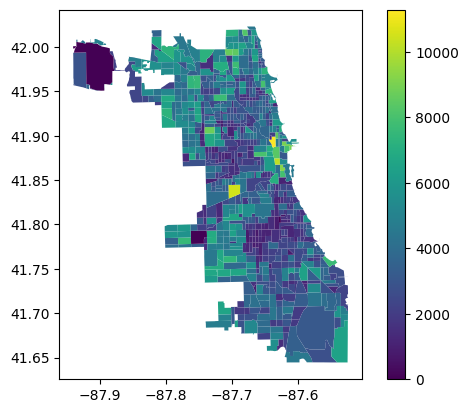

In [17]:
# Plot population variable as example
gdf = gpd.GeoDataFrame(population_df)
gdf["total population"] = gdf["total population"].astype('int64')
gdf.plot("total population", legend=True)

#### Create Education Dataset

In [18]:
# Define education columns
education_cols = [
    "Population 25 Years and Over:",
    "Population 25 Years and Over: Less than High School",
    "Population 25 Years and Over: High School Graduate or More (Includes Equivalency)",
    "Population 25 Years and Over: Some College or More",
    "Population 25 Years and Over: Bachelor's Degree or More",
    "Population 25 Years and Over: Master's Degree or More",
    "Population 25 Years and Over: Professional School Degree or More",
    "Population 25 Years and Over: Doctorate Degree"
]

In [19]:
# Subset DataFrame to education columns only
subset_cols = list(id_col_mapping.values()) + education_cols + ["geometry"]
education_df = merged_gdf[subset_cols]

# Create mapping for correct column format
edu_col_map = {}
for col in education_cols:
    edu_col_map[col] = col.lower().strip(":")

# Apply mapping
education_df = education_df.rename(columns=edu_col_map)

# Preview DataFrame
education_df.head(2)

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2783,220,2563,1551,586,201,0,0,"POLYGON ((-87.72096 41.68395, -87.72030 41.683..."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,4211,459,3752,2365,778,213,129,0,"MULTIPOLYGON (((-87.72004 41.68397, -87.72006 ..."


In [20]:
# Write to file
education_df.to_csv(f"{clean_dir}/education_demographics.csv", index=False)

<Axes: >

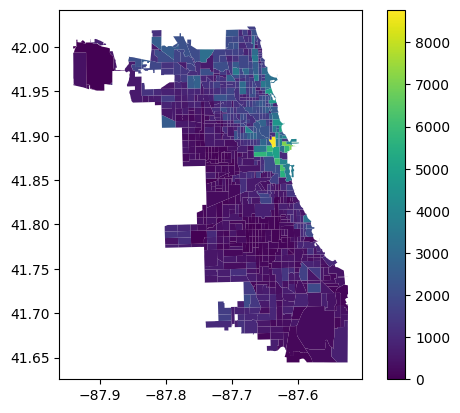

In [21]:
# Plot education variable as example
gdf = gpd.GeoDataFrame(education_df)
col_name = "population 25 years and over: bachelor's degree or more"
gdf[col_name] = gdf[col_name].astype('int64')
gdf.plot(col_name, legend=True)

#### Create Income Dataset

In [22]:
# Define income-related columns
income_cols = [
    "Civilian Population in Labor Force 16 Years and Over:",
    "Civilian Population in Labor Force 16 Years and Over: Employed",
    "Civilian Population in Labor Force 16 Years and Over: Unemployed",
    "Households:",
    "Households: Less than $10,000",
    "Households: $10,000 to $14,999",
    "Households: $15,000 to $19,999",
    "Households: $20,000 to $24,999",
    "Households: $25,000 to $29,999",
    "Households: $30,000 to $34,999",
    "Households: $35,000 to $39,999",
    "Households: $40,000 to $44,999",
    "Households: $45,000 to $49,999",
    "Households: $50,000 to $59,999",
    "Households: $60,000 to $74,999",
    "Households: $75,000 to $99,999",
    "Households: $100,000 to $124,999",
    "Households: $125,000 to $149,999",
    "Households: $150,000 to $199,999",
    "Households: $200,000 or More",
    "Gini Index",
    "Median Gross Rent",
    "Population Age 18 to 64 for Whom Poverty Status  Is Determined:",
    "Population Age 18 to 64 for Whom Poverty Status  Is Determined: Living in Poverty",
    "Population Age 18 to 64 for Whom Poverty Status  Is Determined: At or Above Poverty Level",
    "Households:.1",
    "Households: with Public Assistance Income",
    "Households: No Public Assistance Income",
]

In [23]:
# Subset DataFrame to income columns only
subset_cols = list(id_col_mapping.values()) + income_cols + ["geometry"]
income_df = merged_gdf[subset_cols]

# Create mapping for correct column format
income_col_map = {}
for col in income_cols:
    income_col_map[col] = ' '.join(col.lower().strip(":").split(' '))

# Update mapping to explicitly replace ambiguous columns
income_col_map["Households:.1"] = "total households reporting public assistance income status"
income_col_map["Households:"] = "total households reporting income"

# Apply mapping
income_df = income_df.rename(columns=income_col_map)

# Preview DataFrame
income_df.head(2)

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),civilian population in labor force 16 years and over,civilian population in labor force 16 years and over: employed,civilian population in labor force 16 years and over: unemployed,total households reporting income,"households: less than $10,000","households: $10,000 to $14,999",...,"households: $200,000 or more",gini index,median gross rent,population age 18 to 64 for whom poverty status is determined,population age 18 to 64 for whom poverty status is determined: living in poverty,population age 18 to 64 for whom poverty status is determined: at or above poverty level,total households reporting public assistance income status,households: with public assistance income,households: no public assistance income,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2390,2271,119,1617,152,9,...,113,0.3864,975,2511,207,2304,1617,17,1600,"POLYGON ((-87.72096 41.68395, -87.72030 41.683..."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,3063,2688,375,2634,307,94,...,149,0.4889,990,3600,636,2964,2634,28,2606,"MULTIPOLYGON (((-87.72004 41.68397, -87.72006 ..."


In [24]:
# Write to file
income_df.to_csv(f"{clean_dir}/income_demographics.csv", index=False)

<Axes: >

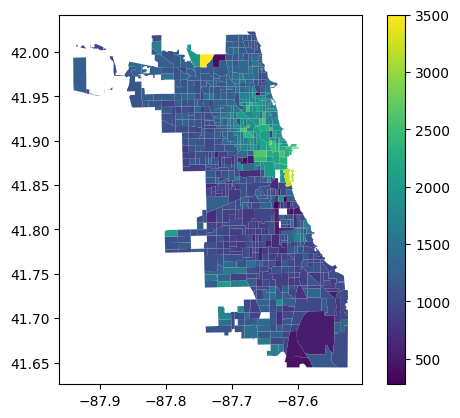

In [25]:
# Plot income variable as example
gdf = gpd.GeoDataFrame(income_df)
col_name = "median gross rent"
gdf[col_name] = gdf[col_name].astype(float)
gdf.plot(col_name, legend=True)

#### Create Commute Dataset

In [26]:
# Define commute columns
commute_cols = [
    "Average Commute to Work (In Min)",
    "Workers 16 Years and Over:",
    "Workers 16 Years and Over: Car, Truck, or Van",
    "Workers 16 Years and Over: Drove Alone",
    "Workers 16 Years and Over: Carpooled",
    "Workers 16 Years and Over: Public Transportation (Includes Taxicab)",
    "Workers 16 Years and Over: Motorcycle",
    "Workers 16 Years and Over: Bicycle",
    "Workers 16 Years and Over: Walked",
    "Workers 16 Years and Over: Other Means",
    "Workers 16 Years and Over: Worked At Home",
    "Workers 16 Years and Over Who Did Not Work At Home:",
    "Workers 16 Years and Over Who Did Not Work At Home: Less than 10 Minutes",
    "Workers 16 Years and Over Who Did Not Work At Home: 10 to 19 Minutes",
    "Workers 16 Years and Over Who Did Not Work At Home: 20 to 29 Minutes",
    "Workers 16 Years and Over Who Did Not Work At Home: 30 to 39 Minutes",
    "Workers 16 Years and Over Who Did Not Work At Home: 40 to 59 Minutes",
    "Workers 16 Years and Over Who Did Not Work At Home: 60 to 89 Minutes",
    "Workers 16 Years and Over Who Did Not Work At Home: 90 or More Minutes",
    "Occupied Housing Units",
    "Occupied Housing Units: No Vehicle Available",
    "Occupied Housing Units: 1 Vehicle Available",
    "Occupied Housing Units: 2 Vehicles Available",
    "Occupied Housing Units: 3 Vehicles Available",
    "Occupied Housing Units: 4 Vehicles Available",
    "Occupied Housing Units: 5 or More Vehicles Available",
    "Renter-Occupied Housing Units",
    "Renter-Occupied Housing Units: No Vehicle Available",
    "Renter-Occupied Housing Units: 1 Vehicle Available",
    "Renter-Occupied Housing Units: 2 Vehicles Available",
    "Renter-Occupied Housing Units: 3 Vehicles Available",
    "Renter-Occupied Housing Units: 4 Vehicles Available",
    "Renter-Occupied Housing Units: 5 or More Vehicles Available"
]

In [27]:
# Subset DataFrame to commute columns only
subset_cols = list(id_col_mapping.values()) + commute_cols + ["geometry"]
commute_df = merged_gdf[subset_cols]

# Create mapping for correct column format
comute_col_map = {}
for col in commute_cols:
    comute_col_map[col] = col.lower().strip(":")

# Apply mapping
commute_df = commute_df.rename(columns=comute_col_map)

# Preview DataFrame
commute_df.head(2)

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),average commute to work (in min),workers 16 years and over,"workers 16 years and over: car, truck, or van",workers 16 years and over: drove alone,workers 16 years and over: carpooled,workers 16 years and over: public transportation (includes taxicab),...,occupied housing units: 4 vehicles available,occupied housing units: 5 or more vehicles available,renter-occupied housing units,renter-occupied housing units: no vehicle available,renter-occupied housing units: 1 vehicle available,renter-occupied housing units: 2 vehicles available,renter-occupied housing units: 3 vehicles available,renter-occupied housing units: 4 vehicles available,renter-occupied housing units: 5 or more vehicles available,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,33,2224,1914,1655,259,106,...,66,0,510,80,337,93,0,0,0,"POLYGON ((-87.72096 41.68395, -87.72030 41.683..."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,31,2650,2186,1877,309,137,...,72,20,1178,157,772,167,79,3,0,"MULTIPOLYGON (((-87.72004 41.68397, -87.72006 ..."


In [28]:
# Write to file
commute_df.to_csv(f"{clean_dir}/commute_demographics.csv", index=False)

<Axes: >

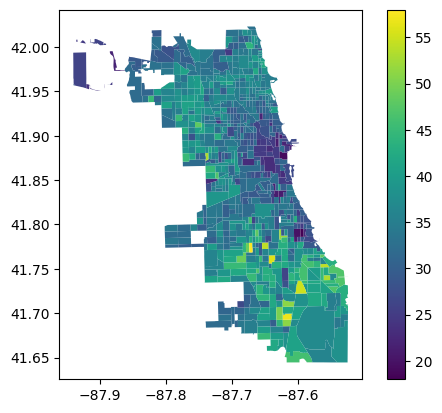

In [29]:
# Plot commute variable as example
gdf = gpd.GeoDataFrame(commute_df)
col_name = "average commute to work (in min)"
gdf[col_name] = gdf[col_name].astype(float)
gdf.plot(col_name, legend=True)

#### Create Internet Usage Dataset

In [30]:
internet_cols = [
    # Computer ownership
    "Total.1",
    "Std. Error: Total.1",
    "Total: Has A Computer",
    "Std. Error: Total: Has A Computer",
    "Total: No Computer",
    "Std. Error: Total: No Computer",

    # Internet subscription
    "Total.2",
    "Std. Error: Total.2",
    "Total: With An Internet Subscription.1",
    "Std. Error: Total: With An Internet Subscription.1",
    "Total: With An Internet Subscription Dial-Up With No Other Type Of Internet Subscription",
    "Std. Error: Total: With An Internet Subscription Dial-Up With No Other Type Of Internet Subscription",
    "Total: With An Internet Subscription Broadband Of Any Type",
    "Std. Error: Total: With An Internet Subscription Broadband Of Any Type",
    "Total: With An Internet Subscription Cellular Data Plan",
    "Std. Error: Total: With An Internet Subscription Cellular Data Plan",
    "Total: With An Internet Subscription Cellular Data Plan Cellular Data Plan With No Other Type Of Internet Subscription",
    "Std. Error: Total: With An Internet Subscription Cellular Data Plan Cellular Data Plan With No Other Type Of Internet Subscription",
    "Total:  Broadband Such As Cable Fiber Optic Or Dsl",
    "Std. Error: Total:  Broadband Such As Cable Fiber Optic Or Dsl",
    "Total:  Broadband Such As Cable Fiber Optic Or Dsl Broadband Such As Cable Fiber Optic Or Dsl With No Other Type Of Internet Subscription",
    "Std. Error: Total:  Broadband Such As Cable Fiber Optic Or Dsl Broadband Such As Cable Fiber Optic Or Dsl With No Other Type Of Internet Subscription",
    "Total:  Satellite Internet Service",
    "Std. Error: Total:  Satellite Internet Service",
    "Total:  Satellite Internet Service Satellite Internet Service With No Other Type Of Internet Subscription",
    "Std. Error: Total:  Satellite Internet Service Satellite Internet Service With No Other Type Of Internet Subscription",
    "Total:  Other Service With No Other Type Of Internet Subscription",
    "Std. Error: Total:  Other Service With No Other Type Of Internet Subscription",
    "Total: Internet Access Without A Subscription.1",
    "Std. Error: Total: Internet Access Without A Subscription.1",
    "Total: No Internet Access.1",
    "Std. Error: Total: No Internet Access.1"
]

In [31]:
# Subset DataFrame to commute columns only
subset_cols = list(id_col_mapping.values()) + internet_cols + ["geometry"]
internet_df = merged_gdf[subset_cols]

# Create mapping for correct column format
internet_col_map = {}
for col in internet_cols:
    internet_col_map[col] = col.lower().strip(".1")

# Update mapping 
to_replace = {
    "Total.1": "Total Surveyed Computer Ownership",
    "Std. Error: Total.1": "Std. Error: Total Surveyed Computer Ownership",
    "Total.2": "Total Surveyed Internet Subscription",
    "Std. Error: Total.2": "Std. Error: Total Surveyed Internet Subscription"
}
for old, new in to_replace.items():
    internet_col_map[old] = new

# Apply mapping
internet_df = internet_df.rename(columns=internet_col_map)

# Preview DataFrame
internet_df.head(2)

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),Total Surveyed Computer Ownership,Std. Error: Total Surveyed Computer Ownership,total: has a computer,std. error: total: has a computer,total: no computer,std. error: total: no computer,...,std. error: total: satellite internet service,total: satellite internet service satellite internet service with no other type of internet subscription,std. error: total: satellite internet service satellite internet service with no other type of internet subscription,total: other service with no other type of internet subscription,std. error: total: other service with no other type of internet subscription,total: internet access without a subscription,std. error: total: internet access without a subscription,total: no internet access,std. error: total: no internet access,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,1617,113.9394,1476,125.4545,141,54.54546,...,23.63636,0,7.272727,0,7.272727,129,61.21212,184,57.57576,"POLYGON ((-87.72096 41.68395, -87.72030 41.683..."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,2634,176.9697,2075,133.9394,559,134.5455,...,59.39394,10,7.272727,0,10.30303,117,62.42424,634,127.2727,"MULTIPOLYGON (((-87.72004 41.68397, -87.72006 ..."


In [32]:
# Write to file
internet_df.to_csv(f"{clean_dir}/internet_demographics.csv", index=False)

<Axes: >

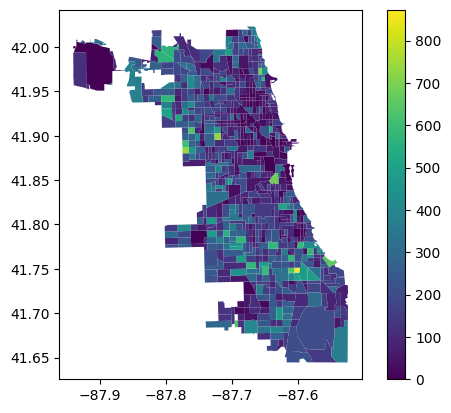

In [33]:
# Plot Internet usage variable as example
gdf = gpd.GeoDataFrame(internet_df)
col_name = "total: no internet access"
gdf[col_name] = gdf[col_name].astype("int64")
gdf.plot(col_name, legend=True)